# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [2]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [3]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [4]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [5]:
# José/Jorge

In [6]:
# Graficar producto A y B VS Climate 

## What are the main climate variables that affect the energy consumption?

In [7]:
# José/Jorge

In [8]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [9]:
# Luis

In [10]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [11]:
# Luis

## Define the energy consumption curve for each season of the year.

In [12]:
# Lupita

## For each group of devices, rank them by cost.


In [13]:
# Lupita

## Anual base line for each device.  

In [14]:
# Daniel

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

 


In [16]:
daily_data.dtypes

Date          datetime64[ns]
device                object
energy               float64
Total Cost           float64
Product_A            float64
Product_B            float64
Temp                 float64
UV                   float64
PrecMM               float64
Hum                  float64
Heat                 float64
DP                   float64
WChill               float64
FLike                float64
dtype: object

In [17]:
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


In [18]:
# Group by con Date y separar por mes
monthly_data=daily_data.groupby(daily_data["Date"].dt.month)[["energy","Total Cost"]].sum()
monthly_data.head()

,energy,Total Cost
Date,,
1,9.351740e+05,1.358950e+06
2,1.013506e+06,1.453258e+06
3,7.834664e+05,1.131248e+06
4,9.011096e+05,1.304792e+06
5,1.205924e+06,1.801907e+06


In [19]:
monthly_data_plot=monthly_data[["Total Cost"]]
monthly_data_plot

,Total Cost
Date,
1,1.358950e+06
2,1.453258e+06
3,1.131248e+06
4,1.304792e+06
5,1.801907e+06
6,1.504765e+06
7,1.455146e+06
8,1.046171e+06
9,1.342725e+06


<function matplotlib.pyplot.show>

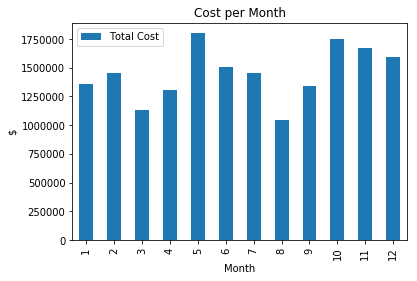

In [20]:
monthly_data_plot.plot(kind="bar")
plt.title("Cost per Month")
plt.xlabel("Month")
plt.ylabel("$")
plt.show


In [28]:
monthly_data_plot_en=monthly_data[["energy"]]
monthly_data_plot_en

,energy
Date,
1,9.351740e+05
2,1.013506e+06
3,7.834664e+05
4,9.011096e+05
5,1.205924e+06
6,1.027715e+06
7,9.756771e+05
8,7.159956e+05
9,9.374302e+05


<function matplotlib.pyplot.show>

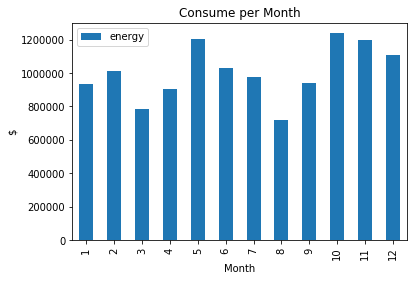

In [30]:
monthly_data_plot_en.plot(kind="bar")
plt.title("Consume per Month")
plt.xlabel("Month")
plt.ylabel("$")
plt.show

In [22]:
# Pivot del DF para energia de cada device
df_energy_bl_plot=daily_data[["Date","device","energy"]]
bl_plot_energy = df_energy_bl_plot.pivot_table(index='device', columns='Date')
bl_plot_energy_2 = df_energy_bl_plot.pivot_table(index='Date', columns='device')
bl_plot_energy_2.head()



energy                                                       \
device      COMP_REF1 COMP_REF13 COMP_REF14  COMP_REF2 COMP_REF4 COMP_REF6   
Date                                                                         
2019-03-01  6162.9256  4652.5780  1746.1431  6476.8864       0.0       0.0   
2019-03-02  5867.5939  3674.4212  1365.2370  6084.0749       0.0       0.0   
2019-03-03  2366.0853    23.5412     4.2068  2564.2945       0.0       0.0   
2019-03-04  4607.5877    26.1756     9.2913  4888.2142       0.0       0.0   
2019-03-05  5112.1222  3902.5069  1421.4789  5340.9948       0.0       0.0   

                                                                 
device     COMP_REF7 COMP_REF8 COMP_REF9 TUNEL1 TUNEL2   TUNEL3  
Date                                                             
2019-03-01   5756.86       0.0       0.0    0.0    0.0  5078.99  
2019-03-02   5789.40       0.0       0.0    0.0    0.0  4379.05  
2019-03-03   5359.15       0.0       0.0    0.0    0.0  1923.88  
2019-03-04   5730.81       0.0       0.0    0.0    0.0  3609.47  
2019-03-05   5891.55       0.0       0.0    0.0    0.0  4075.70

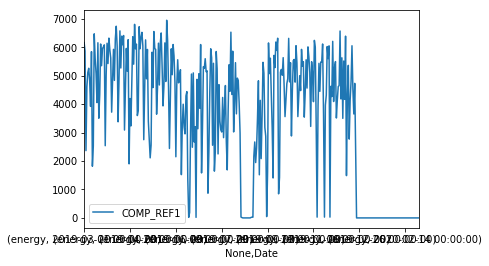

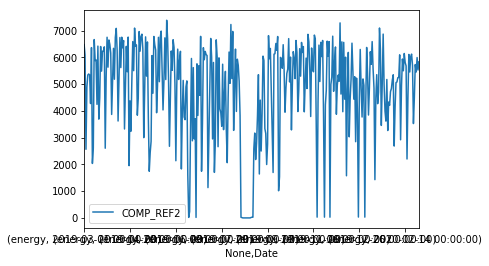

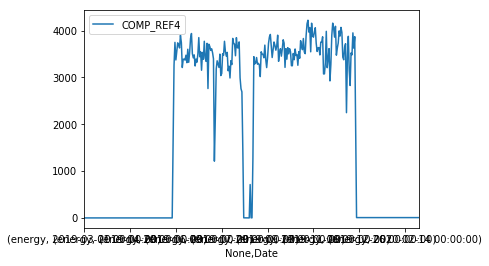

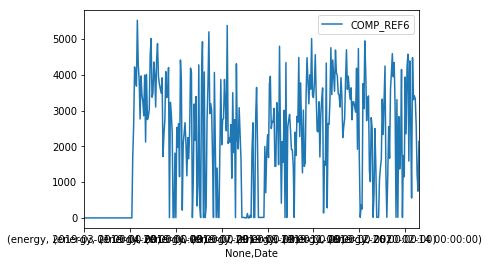

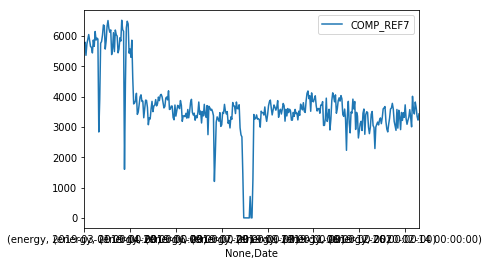

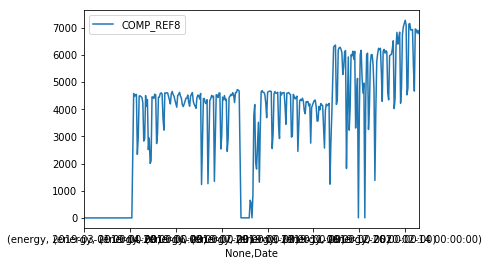

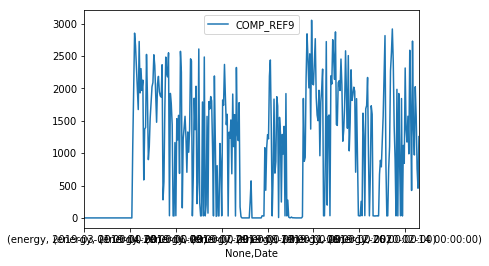

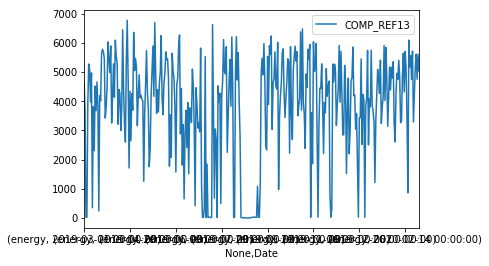

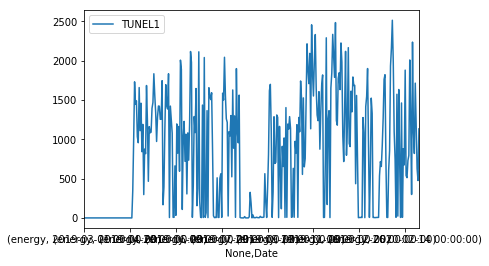

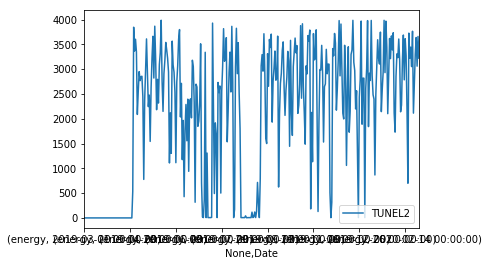

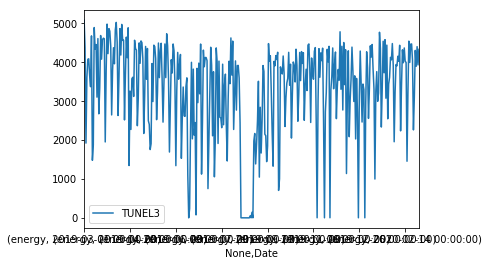

In [25]:
#modificar a formato mensual

bl_plot_energy.loc['COMP_REF1'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF2'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF4'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF6'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF7'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF8'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF9'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF13'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL1'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL2'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL3'].plot()
plt.legend()
plt.show()

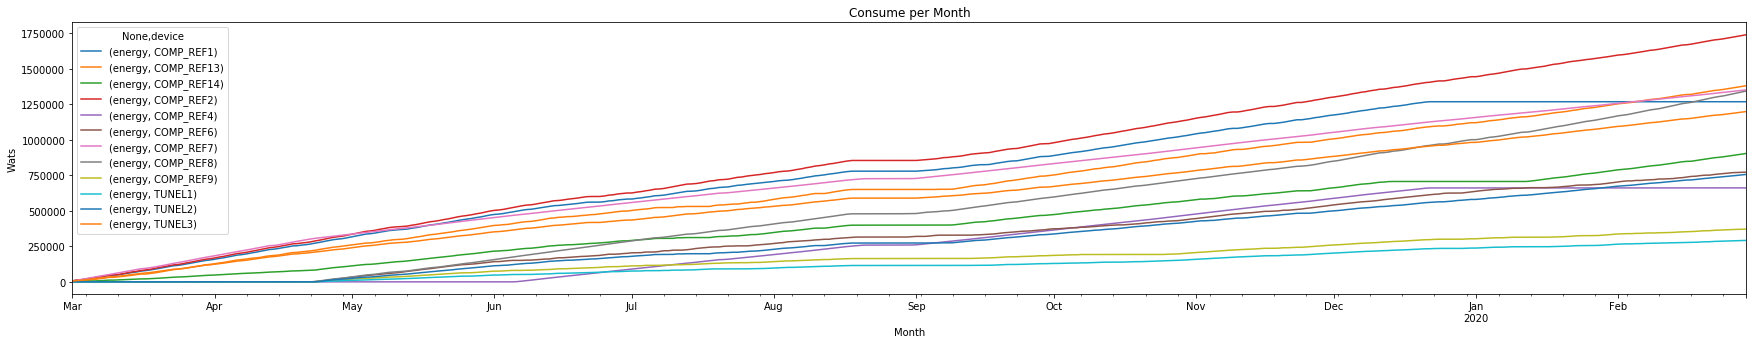

<Figure size 432x288 with 0 Axes>

In [41]:
#Ilegible - Borrar o agrupar?
Energy_Plot_1=bl_plot_energy_2.plot(kind="line",figsize=(30,5))  

type(Energy_Plot_1)

plt.title("Consume per Month")
plt.xlabel("Month")
plt.ylabel("Wats")

plt.show()
plt.tight_layout()

In [32]:
df_TC_bl_plot=daily_data[["Date","device","Total Cost"]]
bl_plot_TC = df_TC_bl_plot.pivot_table(index='device', columns='Date')
bl_plot_TC_2 = df_TC_bl_plot.pivot_table(index='Date', columns='device')

bl_plot_TC_2.head()

Total Cost                                                   \
device        COMP_REF1   COMP_REF13   COMP_REF14    COMP_REF2 COMP_REF4   
Date                                                                       
2019-03-01  8663.348872  6756.636409  2534.492149  9158.706850       0.0   
2019-03-02  6924.216995  3474.836917  1290.825345  7137.632284       0.0   
2019-03-03  3426.565435    36.923328     6.255348  3668.928076       0.0   
2019-03-04  7976.080509    39.877074    14.407094  8460.832579       0.0   
2019-03-05  8033.818215  6785.114505  2469.046264  8360.194823       0.0   

                                                                     \
device     COMP_REF6    COMP_REF7 COMP_REF8 COMP_REF9 TUNEL1 TUNEL2   
Date                                                                  
2019-03-01       0.0  8344.763195       0.0       0.0    0.0    0.0   
2019-03-02       0.0  6528.657048       0.0       0.0    0.0    0.0   
2019-03-03       0.0  8155.312170       0.0       0.0    0.0    0.0   
2019-03-04       0.0  8950.346281       0.0       0.0    0.0    0.0   
2019-03-05       0.0  9007.216201       0.0       0.0    0.0    0.0   

                         
device           TUNEL3  
Date                     
2019-03-01  7288.358004  
2019-03-02  5061.237472  
2019-03-03  2729.927290  
2019-03-04  6224.382171  
2019-03-05  6376.443471

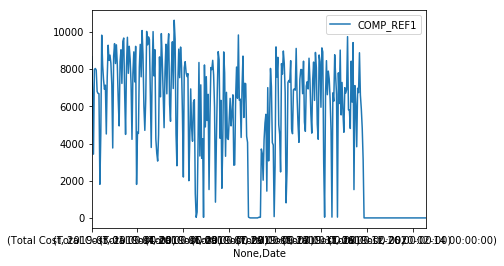

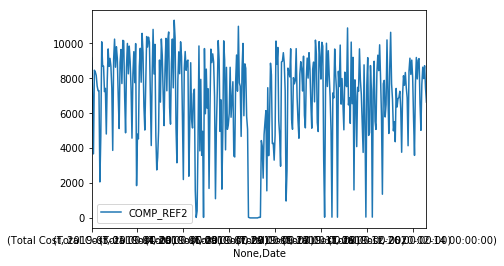

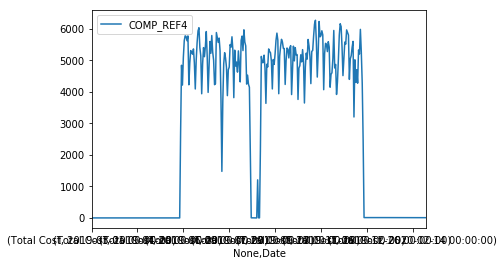

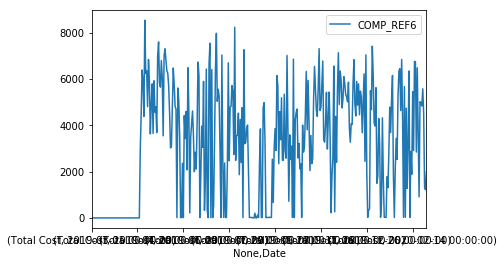

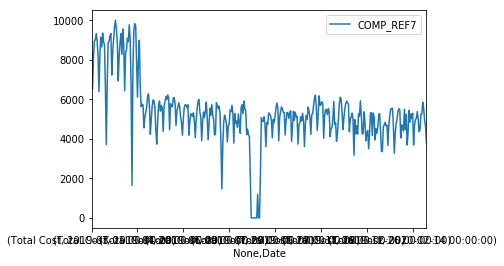

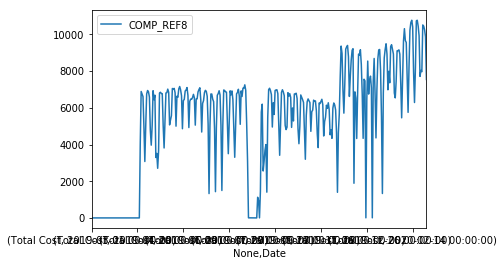

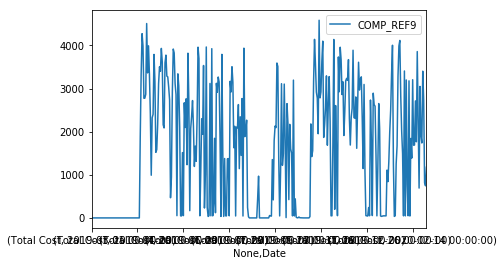

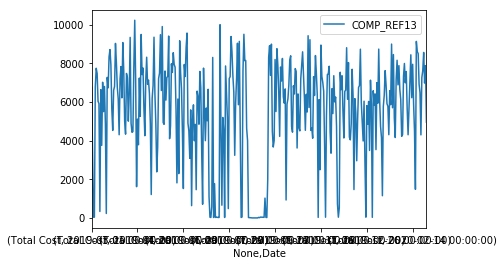

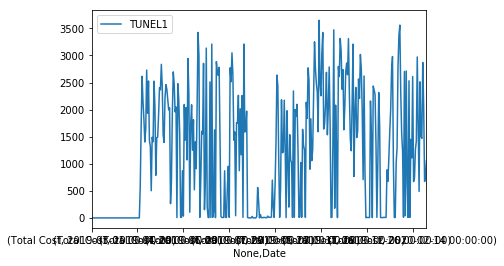

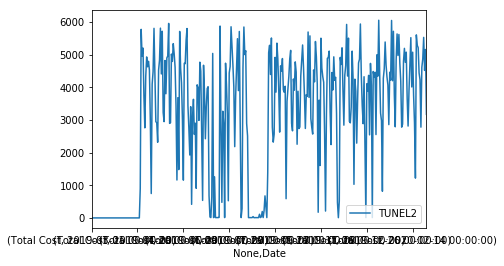

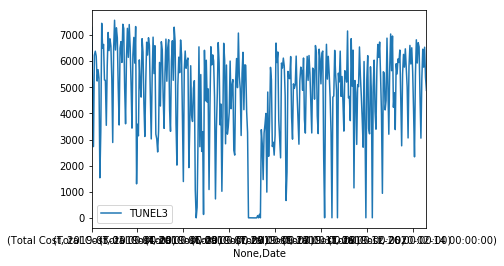

In [33]:
#modificar a formato mensual

bl_plot_TC.loc['COMP_REF1'].plot()
plt.legend()
plt.show()


bl_plot_TC.loc['COMP_REF2'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF4'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF6'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF7'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF8'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF9'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF13'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL1'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL2'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL3'].plot()
plt.legend()
plt.show()

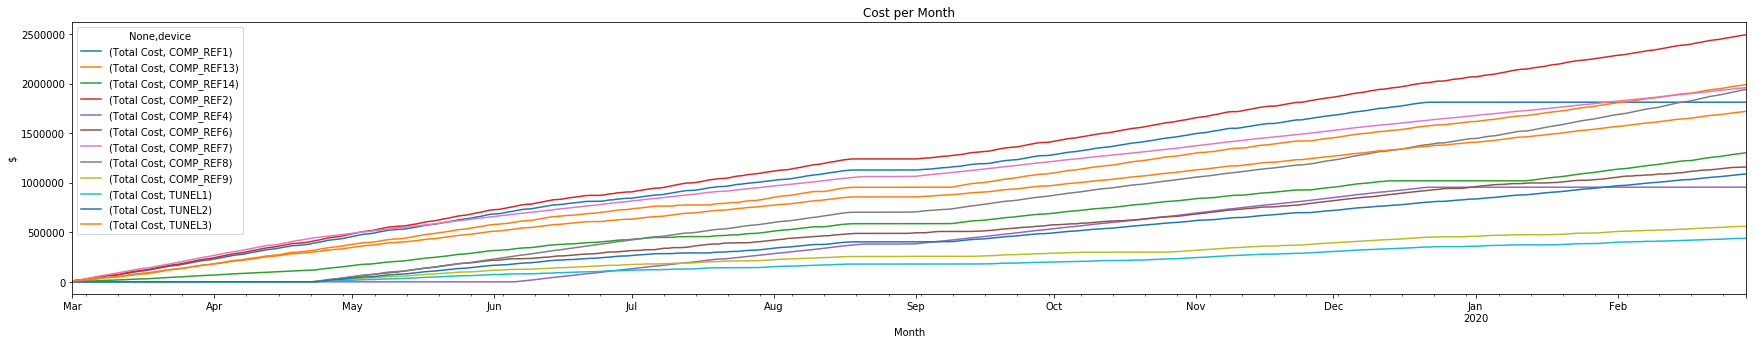

<Figure size 432x288 with 0 Axes>

In [42]:
#Ilegible - Borrar o agrupar?
TC_Plot_1=bl_plot_TC_2.plot(kind="line",figsize=(30,5))  

type(TC_Plot_1)

plt.title("Cost per Month")
plt.xlabel("Month")
plt.ylabel("$")

plt.show()
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2330ca10>,
      dtype=object)

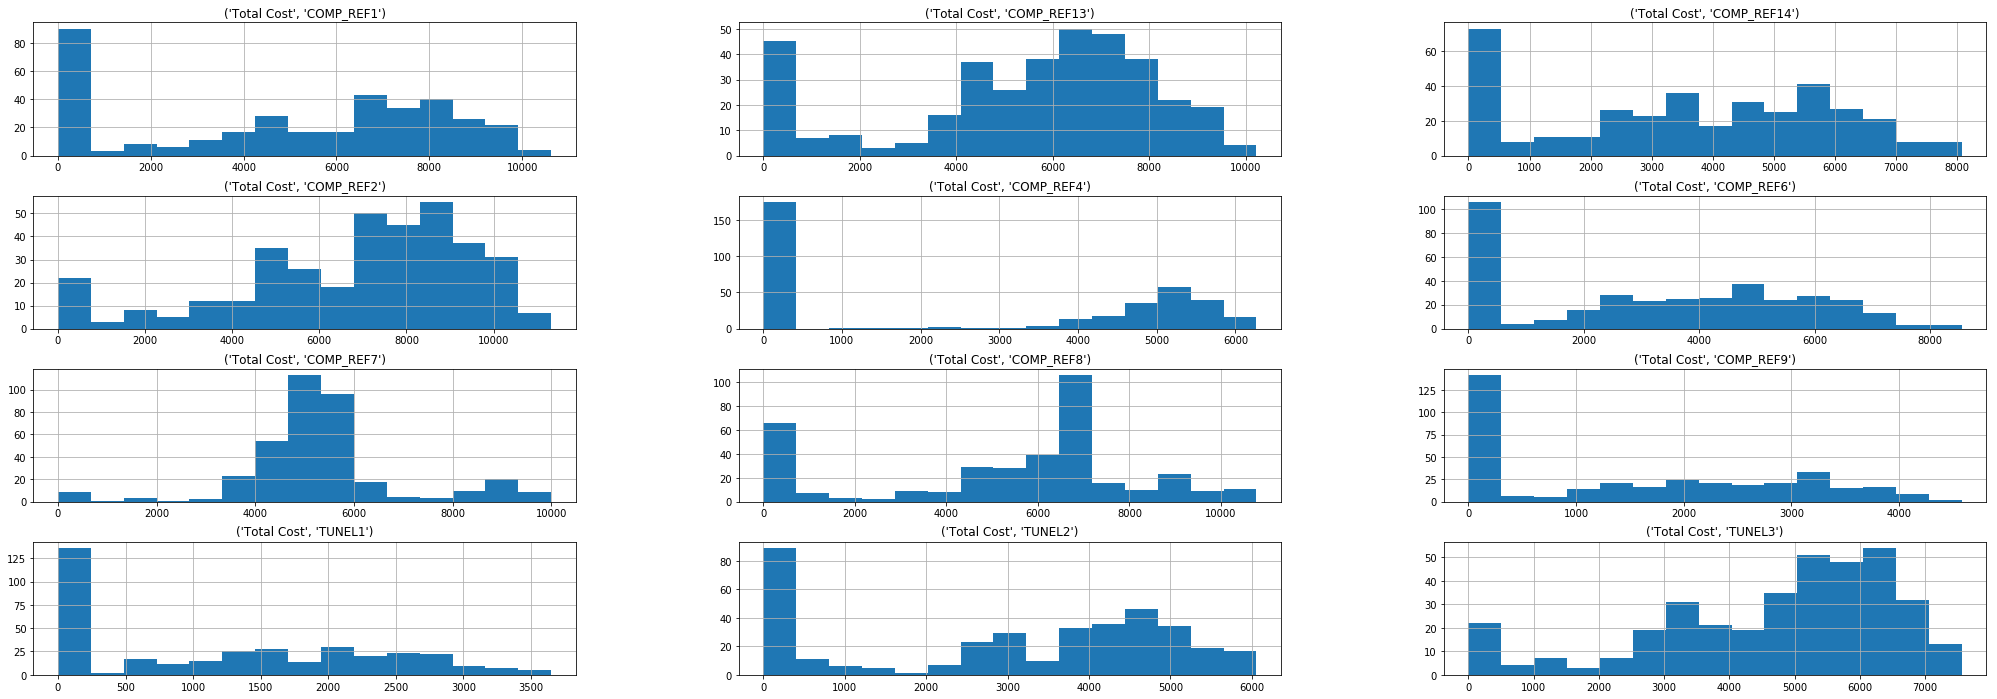

In [35]:
bl_plot_TC_2.hist(bins=15,figsize=(35,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a225c37d0>,
      dtype=object)

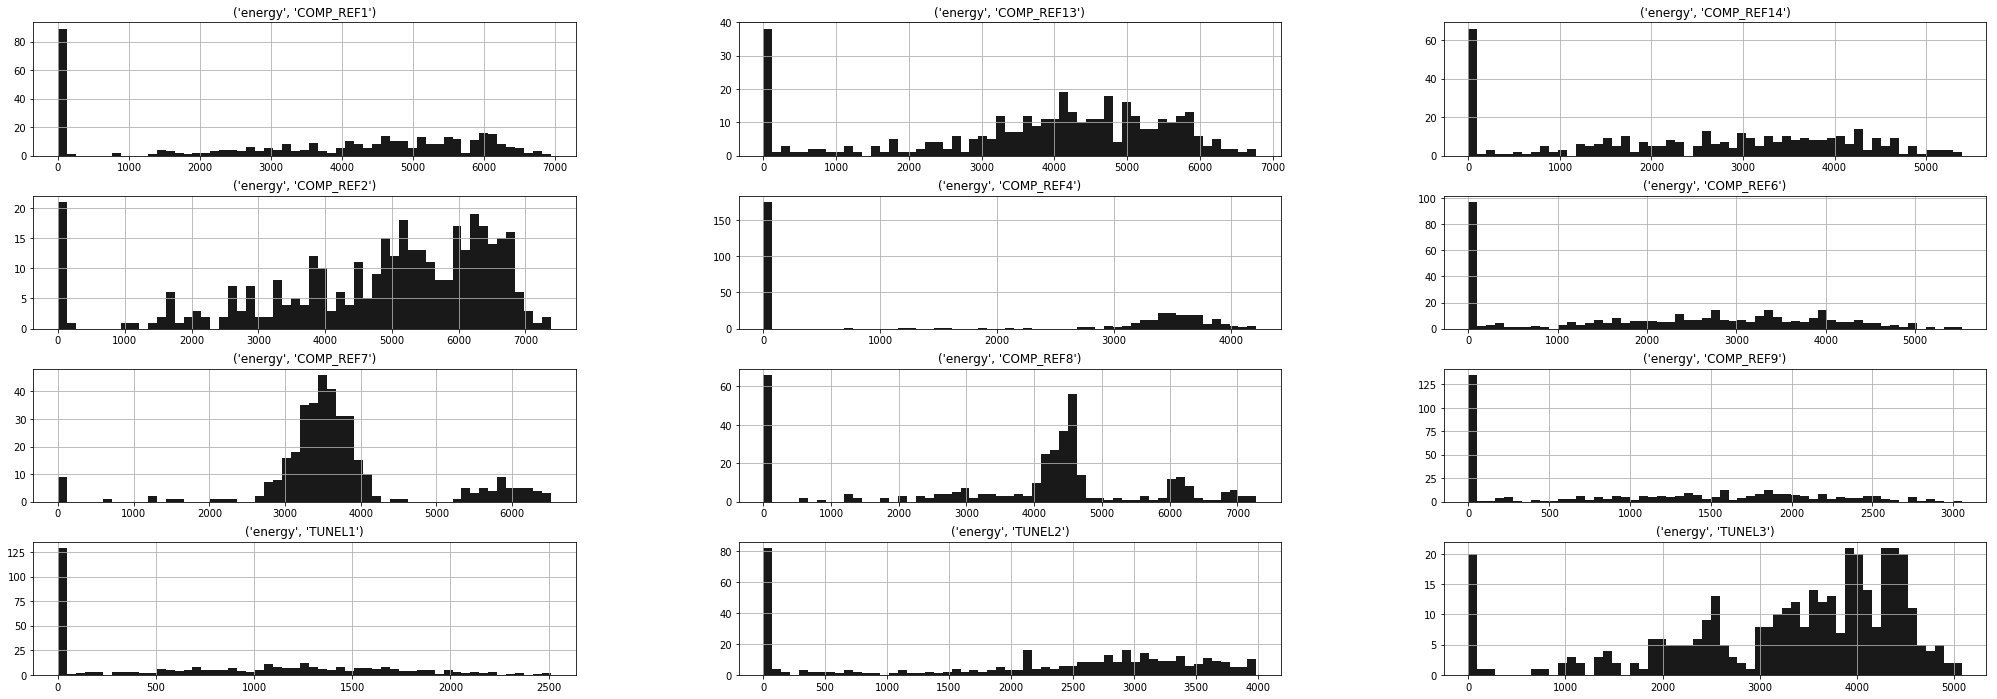

In [36]:
bl_plot_energy_2.hist(color='k', alpha=.9, bins=55,figsize=(35,12))


<Figure size 432x288 with 0 Axes>

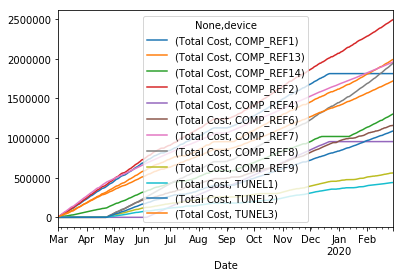

In [38]:
bl_plot_TC_2=bl_plot_TC_2.cumsum()
plt.figure();
bl_plot_TC_2.plot();

<Figure size 432x288 with 0 Axes>

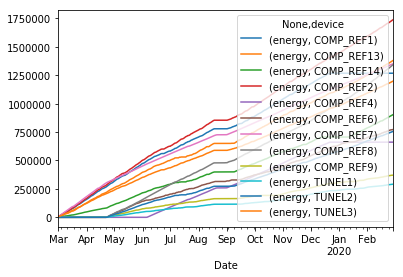

In [39]:
bl_plot_energy_2=bl_plot_energy_2.cumsum()
plt.figure();
bl_plot_energy_2.plot();

## Make production recommendations, based on the optimal production. 

In [ ]:
# Daniel